# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV


import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping


# Load in Data

The dataset used is available in the GitHub repository under the name **"credit_card_churn.csv**. This data was retrieved from Kaggle.com, with a direct link located in the repository README file.

In [2]:
#Use pandas, load in dataset 
credit_df = pd.read_csv("credit_card_churn.csv")

#Check that data loaded in correctly
credit_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Understanding the Data

Before going into the deep analysis, it is essential to understand the data that will be used in the modeling solution. Looking at the properties this data set will provide enough information to determine if a solution to the customer attrition issue can be produced.

In [3]:
#credit_df.info()

There are no nulls present in any of the variables, each has 10127 observations - indicating no need to alter the dataset due to missing information. There are 23 columns, 10127 observations, and no null values. Some of these columns will not be necessary for the later stages of analysis and can be subsequently cut from our working dataframe. 



To get a better idea of what can be cut, here are the variable names and definitions:
1. **CLIENTNUM**: *Client number. Unique identified for the customer holding the account*
2. **Attrition_Flag**: *Internal event (customer activity) variable - if the account is closed then 1 else 0* ***TARGET VARIABLE***
3. **Customer_Age**: *Demographic variable - Customer's Age in Years*
4. **Gender**: *Demographic variable - M=Male, F=Female*
5. **Dependent_count**: *Demographic variable - Number of dependents*
6. **Education_Level**: *Demographic variable - Educational Qualification of the account holder*
7. **Marital_Status**: *Demographic variable - Married, Single, Divorced, Unknown*
8. **Income_Category**: *Demographic variable - Annual Income Category of the account holder*
9. **Card_Category**: *Product variable - Type of card*
10. **Months_on_book**: *Period of relationship with bank*
11. **Total_Relationship_Count**: *Total number of products held by the customer*
12. **Months_Inactive_12_mon**: *Number of months inactive in the last 12 months*
13. **Contacts_Count_12_mon**: *Number of contacts in the last 12 months*
14. **Credit_Limit**: *Credit limit on the Credit Card*
15. **Total_Revolving_Bal**: *Total revolving balance on the Credit Card*
16. **Avg_Open_To_Buy**: *Open to Buy Credit Line (Average of last 12 months)*
17. **Total_Amt_Chng_Q4_Q1**: *Change in Transaction Amount (Q4 over Q1)*
18. **Total_Trans_Amt**: *Total transaction amount (last 12 months)*
19. **Total_Trans_Ct**: *Total transaction count (last 12 months)*
20. **Total_Ct_Chng_Q4_Q1**: *Change in transaction count (Q4 over Q1)*
21. **Avg_Utilization_Ratio**: *Average card utilization ratio*
22. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2**: *Naive Bayes - note from author to remove*
23. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1** *Naive Bayes - note from author to remove*






Before beginning the cleaning process, it is beneficial to be familiar with the descriptive statistics of the numerical variables. 

In [4]:
#Use the describe() function to evaluate descriptive stats
credit_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


# Data Cleaning

Based on our initial understanding of the data set we are working with, it is clear that some variables should be dropped - as they would not provide anything useful to our modeling or analysis. 

**CLIENTNUM** should be dropped, this is the client ID number - would not provide anything useful

**Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2** Notebook author noted that this column should be ignored and deleted 

**Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1** Notebook author noted that this column should be ignored and deleted

The remainder of the variables provide unique information on the customer that may influence the ultimate outcome of closing their credit card account. 

In [5]:
#Drop irrelevant columns 
credit_clean_df = credit_df.drop(columns=['CLIENTNUM',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [6]:
#Check that the columns were dropped properly
credit_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

There are now 20 columns with 10127 observations in total. No columns have any nulls present, so no cleaning is required on that end. There are multiple variables within this data set that are not numbers and need to be encoded as such so that they can be fed into our developed models and run properly. There are six different object variables.

Object variables that need to be cleaned / one-hot encoded / label encoded:
- Attrition Flag
- Gender
- Education Level
- Marital Status 
- Income Category 
- Card Category 

#### Attrition Flag Encoding
To view all values and their respective counts, use the .value_counts() function on the **Attrition_Flag** column. This way we will know the string values - giving us insight as to how we should encode them.

In [7]:
credit_clean_df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Redeclare the values in the column by mapping a dictionary of corresponding new values. In this case, encoding *existing customer* as 0 and *attrited customer* as 1 makes the most sense - we are looking to evaluate the factors that make a customer closer their account - model outputs will be most interpretable if the *attrited customers* are the positive case within this variable. 

In [8]:
credit_clean_df['Attrition_Flag'] = credit_clean_df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

#### Marital Status Encoding
Repeat the previous process to view all string values in the **Marital_Status** column. 

In [9]:
credit_clean_df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Marital status is an object variable with no clear order that we can interpret numerically, so it makes the most sense to one-hot encode and create dummy variables for each value. 

#### Gender Encoding
Repeat the previous process to view all string values in the **Gender** column. 

In [10]:
credit_clean_df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

Gender also has no clear order that we can interpret numerically, so this should be encoded using one-hot encoding as well. Both **Marital_Status** and **Gender** can be encoded in the same line.

In [11]:
credit_clean_df = pd.get_dummies(credit_clean_df, columns = ['Marital_Status', 'Gender'], dtype=int)

#### Education Level Encoding
Repeat the previous process to view all string values in the **Education_Level** column. 

In [12]:
credit_clean_df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Unlike Gender and Marital Status, Education level has a natural ranking and should be label encoded. The label encoder function, by default, ranks the object variable based on alphabetical value - this would be a potential cause for confusion when it comes time to interpret. To avoid this mislabeling we are manually encoding these labels.

Based on the values shown above, we are encoding as follows:
- 0 = Unknown
- 1 = Uneducated 
- 2 = High School
- 3 = College
- 4 = Graduate
- 5 = Post-Graduate
- 6 = Doctorate 

This way we can interpret higher values here to be higher education level reached. 

In [13]:
credit_clean_df['Education_Level'] = credit_clean_df['Education_Level'].apply(lambda x: ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'].index(x))
credit_clean_df['Education_Level'].value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: Education_Level, dtype: int64

#### Income Category Encoding
Repeat the previous process to view all string values in the **Income_Category** column. 

In [14]:
credit_clean_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

The same is true here as it was for **Education_Level**, this variable has a natural ranking. These values will need to be manually encoded as well.

Based on the values shown above, we are encoding as follows:
- 0 = Unknown
- 1 = Less than 40K 
- 2 = 40K - 60K
- 3 = 60K - 80K
- 4 = 80K - 120K
- 5 = 120K+

This way we can interpret higher values here to be higher income category of customer. 

In [15]:
credit_clean_df['Income_Category'] = credit_clean_df['Income_Category'].apply(lambda x: ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'].index(x))
credit_clean_df['Income_Category'].value_counts()

1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: Income_Category, dtype: int64

#### Card Category Encoding
Repeat the previous process to view all string values in the **Card_Category** column. 

In [16]:
credit_clean_df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

This variable has a natural ranking just like the previous two. These values will need to be manually encoded as well.

Based on the values shown above, we are encoding as follows:
- 0 = Blue
- 1 = Silver
- 2 = Gold
- 3 = Platinum

This way we can interpret higher values here to be higher card category / tier of customer. 

In [17]:
credit_clean_df['Card_Category'] = credit_clean_df['Card_Category'].apply(lambda x: ['Blue', 'Silver', 'Gold', 'Platinum'].index(x))
credit_clean_df['Card_Category'].value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

Evaluate the resulting data frame.

In [18]:
credit_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Income_Category           10127 non-null  int64  
 5   Card_Category             10127 non-null  int64  
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

Now there are 23 columns due to the one-hot encoding of **Gender** and **Marital_Status**. Also after encoding, there are still no nulls, and now there are no longer and variables that are *object* DType. Since our data set is now all numbers, we can use **credit_clean_df** to run statistical analysis and begin our modeling phase.

#### Evaluating 'Unknown' Values in Categorical Columns

After looking at the values of each of the categorical variables, another potential cleaning issue came to surface. Even though the data frame has no null values, there is still missing information. In the variables, **Marital_Status**, **Education_Level** and **Income_Category**, there are 'Unknown' values. If there are observations with multiple 'Unknown' values for multiple categories then it may be a good idea to drop these observations. Otherwise, 'Unknown' will stay encoded as the numerical value of 0 for **Income_Category** and **Education_Level**, and one-hot encoded for **Marital_Status**. 

Looking into the 'Unknown' values to see if there are any observations with multiple pieces of unknown data. For simplicity, we will use the original dataframe, **credit_df** (not encoded), to check the number of observations that have multiple 'Unknown' values.

In [19]:
credit_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [20]:
#Create a copy dataframe 
unknown_2 = credit_df.copy()

#Checking to see how many observations have two values missing / 'unknown'
unknown_2['matching1'] = unknown_2.apply(lambda x: x.Marital_Status == x.Education_Level, axis=1)
unknown_2['matching2'] = unknown_2.apply(lambda x: x.Marital_Status == x.Income_Category, axis=1)
unknown_2['matching3'] = unknown_2.apply(lambda x: x.Income_Category == x.Education_Level, axis=1)

#Subset dataframe that returns values only if one of the matches is true
unknown_2 = unknown_2[(unknown_2.matching1 == True) | (unknown_2.matching2 == True) | (unknown_2.matching3 == True)]

#Return number of observations in the dataframe 
print(len(unknown_2))

327


There are 327 observations with at least 2 columns of 'Unknown' values. That is the equivalent of about 3.22% of the total observations in the main dataset.

How many of these observations are from existing customers vs. attrited customers?

In [21]:
#Use subset data frame in order to get the value counts of the attrition flag
print(unknown_2['Attrition_Flag'].value_counts())

Existing Customer    270
Attrited Customer     57
Name: Attrition_Flag, dtype: int64


Of the 327 observations that have at least 2 columns of 'Unknown' values, 57 of them are attrited customers. There are 1627 attrited customer observations, meaning 3.5% of our attrited customer observations have 2+ 'Unknown' values.

How many observations have 3 'Unknown' values? 

In [22]:
unknown_3 = credit_df.copy()
unknown_3['matching'] = unknown_3.apply(lambda x: x.Marital_Status == x.Education_Level == x.Income_Category, axis=1)
unknown_3['matching'].value_counts()

False    10120
True         7
Name: matching, dtype: int64

There are 7 observations with 3 columns of 'Unknown' values. That is the equivalent of 0.07% of our data set, it is highly unlikely that such a small number would significantly skew any results.

In [23]:
#Use subset data frame in order to get the value counts of the attrition flag
unknown_3 = unknown_3.loc[unknown_3['matching'] == True]
print(unknown_3['Attrition_Flag'].value_counts())

Existing Customer    6
Attrited Customer    1
Name: Attrition_Flag, dtype: int64


There are only 7 cases where marital status, education level, and income category have the same 'Unknown' value. Of those 7, only 1 is an attrited customer - which is a positive sign that such a small number of our target observations have 3 unknown values. We will continue with the full dataset and not drop any observations. 

# Exploratory Data Analysis

Now that the data is cleaned and in a good state to work with, it is time to begin exploring relationships within the data. In this section we will leverage visualization packages and statistical analysis to gain a deeper understanding of the data. 

**credit_df** is the original data frame (no label encoding)

**credit_clean_df** is the data frame that will be used for modeling (label encoded)

In [24]:
#Correlation table
credit_clean_df.corr()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_F,Gender_M
Attrition_Flag,1.000000,0.018203,0.018991,0.008796,-0.013577,0.002354,0.013687,-0.150005,0.152449,0.204491,...,-0.168598,-0.371403,-0.290054,-0.178410,0.000850,-0.023735,0.019037,0.008904,0.037272,-0.037272
Customer_Age,0.018203,1.000000,-0.122254,-0.002369,0.023508,-0.018235,0.788912,-0.010931,0.054361,-0.018452,...,-0.046446,-0.067097,-0.012143,0.007114,-0.042614,0.047364,-0.011248,-0.026694,0.017312,-0.017312
Dependent_count,0.018991,-0.122254,1.000000,0.000472,0.066278,0.030469,-0.103062,-0.039076,-0.010768,-0.040505,...,0.025046,0.049912,0.011087,-0.037135,0.006697,0.014385,-0.040707,0.041743,-0.004563,0.004563
Education_Level,0.008796,-0.002369,0.000472,1.000000,-0.011677,0.014989,0.006613,0.000766,0.005761,-0.006280,...,-0.007460,-0.004307,-0.016692,-0.001849,0.005493,0.014051,-0.015067,-0.004186,0.005087,-0.005087
Income_Category,-0.013577,0.023508,0.066278,-0.011677,1.000000,0.077326,0.022122,-0.003202,-0.016310,0.023113,...,0.019651,-0.054569,-0.012657,-0.246476,-0.008734,0.023808,-0.024715,0.009417,-0.786608,0.786608
Card_Category,0.002354,-0.018235,0.030469,0.014989,0.077326,1.000000,-0.012535,-0.094077,-0.014629,-0.000442,...,0.196003,0.134275,-0.007261,-0.198711,-0.004028,-0.049254,0.040783,0.021881,-0.080093,0.080093
Months_on_book,0.013687,0.788912,-0.103062,0.006613,0.022122,-0.012535,1.000000,-0.009203,0.074164,-0.010774,...,-0.038591,-0.049819,-0.014072,-0.007541,-0.027678,0.033194,-0.005065,-0.026145,0.006728,-0.006728
Total_Relationship_Count,-0.150005,-0.010931,-0.039076,0.000766,-0.003202,-0.094077,-0.009203,1.000000,-0.003675,0.055203,...,-0.347229,-0.241891,0.040831,0.067663,0.009276,0.017001,-0.017329,-0.009376,-0.003157,0.003157
Months_Inactive_12_mon,0.152449,0.054361,-0.010768,0.005761,-0.016310,-0.014629,0.074164,-0.003675,1.000000,0.029493,...,-0.036982,-0.042787,-0.038989,-0.007503,0.001796,-0.007065,0.008973,-0.005053,0.011163,-0.011163
Contacts_Count_12_mon,0.204491,-0.018452,-0.040505,-0.006280,0.023113,-0.000442,-0.010774,0.055203,0.029493,1.000000,...,-0.112774,-0.152213,-0.094997,-0.055471,-0.008389,0.001598,0.007997,-0.009562,-0.039987,0.039987


Variables that are highly correlated:
1. **Months_on_book** + **Customer Age**: 0.788
2. **Income_Category** + **Credit_Limit**: 0.476
3. **Income_Category** + **Avg_Open_To_Buy**: 0.473
4. **Card_Category** + **Credit_Limit**: 0.492
5. **Card_Category** + **Avg_Open_To_Buy**: 0.489
6. **Total_Trans_Amt** + **Total_Relationship_Count**: -0.347
7. **Avg_Utilization_Ratio** + **Total_Revolving_Bal**: 0.624
8. **Avg_Utilization_Ratio** + **Avg_Open_To_Buy**: -0.539
9. **Total_Trans_Amt** + **Total_Trans_Ct**: 0.807

One interesting thing to look at is evaluating which variables are most strongly correlated to the **Attrition_Flag** column. Based on the table above, **Total_Trans_Ct** (-0.371), **Total_Ct_Chng_Q4_Q1** (-0.29), and **Total_Revolving_Bal** (-0.263) are the three most strongly correlated variables. Looking into these further would be of interest.

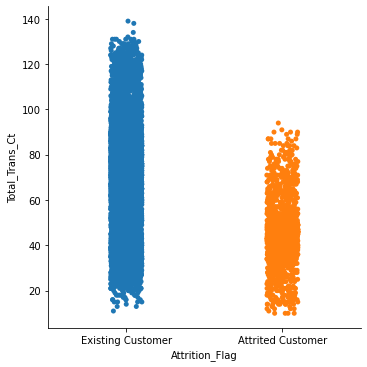

In [25]:
#Catplot of Total_Trans_Amt vs. Attrition Flag
sns.catplot(data=credit_df, x='Attrition_Flag', y='Total_Trans_Ct')

Attrited customers appear to have a max total transaction count of around 90 whereas existing customers can peak at over 130. Attrited customers in general have a smaller total transaction count.

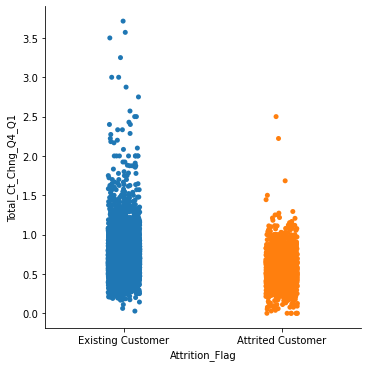

In [26]:
#Catplot of Total_Ct_Chng_Q4_Q1 vs. Attrition Flag
sns.catplot(data=credit_df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')

Considering the variable, **Total_Ct_Chng_Q4_Q1**, is the change in transaction count (Q4/Q1), we can interpret larger values as customers who increased their quarterly transactions throughout the year. There appears to be larger numbers present for existing customers, meaning that if customers continue to increase the number of transactions, it is less likely that they will exit. 

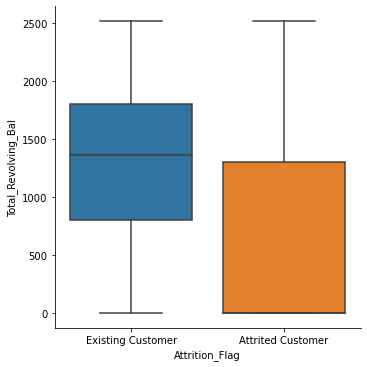

In [27]:
#Catplot of Total_Revolving_Bal vs. Attrition Flag
sns.catplot(data=credit_df, x='Attrition_Flag', y='Total_Revolving_Bal', kind='box')

Existing customers have a higher average total revolving balance than attrited customers - it looks unlikely that a customer above a total revolving balance of $1,300 will exit. This indicates that customers with lower revolving balances to pay off are more likely to exit - they are keeping their obligations low and relatively more free to move on to a competitive opportunity.

It would also be interesting to see how demographic variables compare in terms of attrited vs. existing customers. 

<AxesSubplot:xlabel='Card_Category'>

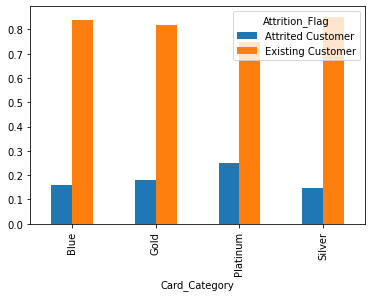

In [28]:
#Compare percentage of attrited customers per card category
(pd.crosstab(credit_df['Card_Category'],credit_df['Attrition_Flag'], 
             normalize='index')
   .plot.bar(stacked=False)
)

The Silver card has the smallest percentage of customers exit, with Blue in a close second. It seems as though there are more issues with exiting customers the higher one climbs up the credit card tiers. There could be an issue with the fee structure of the higher tiers, or they simply could be more difficult to maintain than lower tiers. The customers in the higher tiers may have more income to spend, and can afford to shop around for the best high tier credit card on the market.

How does **Income_Category** compare to **Card_Category** and **Credit_Limit**?

C:\Users\asurowiec\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

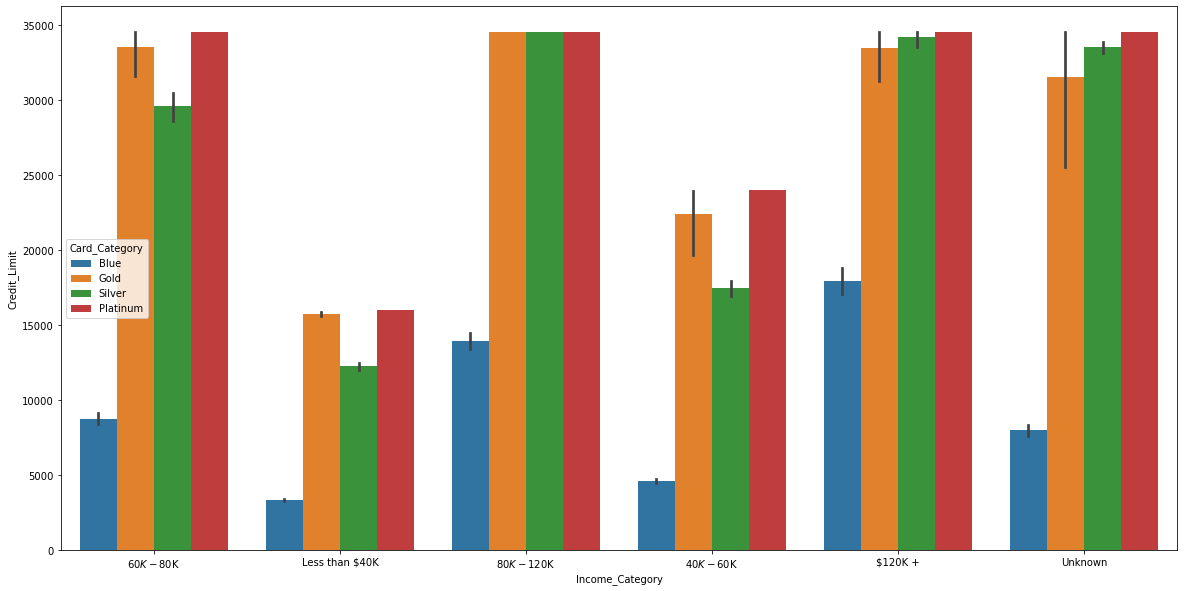

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(credit_df['Income_Category'], credit_df['Credit_Limit'], hue=credit_df['Card_Category'])

Platinum card holders do seem to have the highest relative credit limit in each of the respective income category groups. This further solidifies the point that higher-tier card holders have the financial ability to shop around and find the best deals.

What about **Education_Level**? Does education influence **Credit_Limit**, and how does that differ based on **Attrition_Flag**?

C:\Users\asurowiec\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

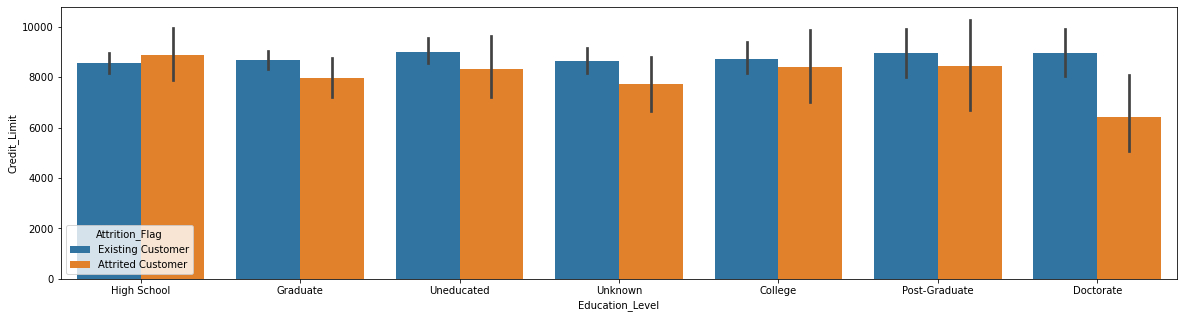

In [30]:
#Compare credit limit by education level - then see how these differ between attrited and existing customers
plt.figure(figsize=(20,5))
sns.barplot(credit_df['Education_Level'], credit_df['Credit_Limit'], hue=credit_df['Attrition_Flag'])

In most cases, attrited customers appear to have smaller credit limits compared to their existing customer counter part within each education level. It is interesting that attrited customers who have a Doctorate have the lowest credit limit of all groups on average. Overall, there doesn't seem to be a clear pattern between **Credit_Limit**, **Education_Level**, and a customer's **Attrition_Flag**.

**Card_Category** also has a notable correlation with **Total_Trans_Ct** - this is particularly interesting considering **Total_Trans_Ct** is the most correlated with **Attrition_Flag** (-0.37). How do these three variables compare? 

C:\Users\asurowiec\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Ct'>

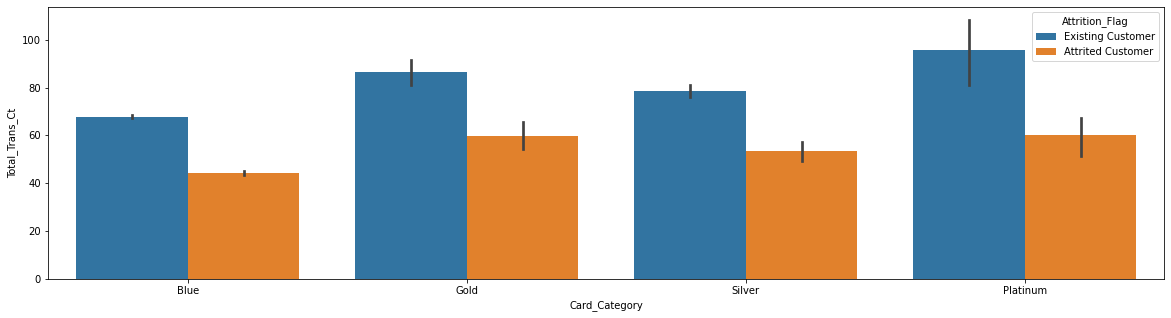

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(credit_df['Card_Category'], credit_df['Total_Trans_Ct'], hue=credit_df['Attrition_Flag'])

In every card category, attrited customers have fewer total transactions than existing customers. As the card category tier rises (Blue-> Silver -> Gold -> Platinum), the total transaction count increases for what appears to be every subgroup. It looks as though attrited customers have around 20 fewer transactions than existing customers in each card group. 

# Model Building

The purpose of the model building stage is to create a highly function classification model that can take in the numerous pieces of customer data and classify whether the customer is likely to churn / cancel their credit card. There are multiple routes that could generate a production grade model that could signficantly help the bank to understand what makes a customer likely to leave - in turn this could impact future marketing strategies, as well as allow them to be proactive and attempt to find methods of mitigating this issue among certain groups. 

## Logistic Regression

## Decision Tree

## Random Forest

## XGBoost

XGBoost is an optimized distributed gradient-boosted decision tree library designed for efficient and scalable training of machine learning models. This algorithm is known to be effective in cases of class imbalance and is less prone to overfitting. Start by splitting the cleaned data frame into variables X and y. 

In [32]:
X = credit_clean_df.drop('Attrition_Flag', axis=1)
y = credit_clean_df['Attrition_Flag']

##### Baseline Model
Split the data into training and testing sets with a test size of 0.25. Using the default parameters we will train an XGBoost model to use as our baseline to compare our tuning against.

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a default XGBoost Classifier
XG_model = xgb.XGBClassifier()

# Fit the model to the training data
XG_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = XG_model.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Creating a Modeling Function
To save time in comparing our baseline and optimal model results, make a function that trains and cross validates based on the model parameters of the input model. This function will also fit, predict, return modeling report (scores), and plot feature importance. 

In [84]:
# Create a function to cross fold, train, predict, score
def xgbmodel_scoring(model, X_train, y_train, X_test, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    # Run a cross validation that will enable us to confidently set the n_estimators parameter
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        model.set_params(n_estimators=cvresult.shape[0])
    
    # Fit the algorithm on the data
    model.fit(X_train, y_train)
    
    # Predict test set:
    y_pred = model.predict(X_test)
        
    # Modeling scores:
    print ("\nModel Test Scores")
    print ("Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, y_pred))
    print ("Precision (Test): %.4g" % metrics.precision_score(y_test, y_pred))
    print ("Recall (Test): %.4g" % metrics.recall_score(y_test, y_pred))
    print ("F1 (Test): %.4g" % metrics.f1_score(y_test, y_pred))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_pred))
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract the values from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # Print cm values to evaluate the false negative, etc. count
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print("True Positives:", tp)
    
    # Find feature importances and then Plot               
    feat_imp = pd.Series(model.get_booster().get_score(importance_type='gain')).sort_values(ascending=True)
    feat_imp.plot(kind='barh', title='Feature Importances')
    plt.ylabel('Feature Importance Score (Gain)')
    
    # Print feature importance series to know exact numbers 
    print("\n",feat_imp)

##### Baseline Scores
Evaluate the output of the default XGBoost model, this will be compared to our final model outputs after hyperparameter tuning.


Model Test Scores
Accuracy (Test): 0.9676
Precision (Test): 0.91
Recall (Test): 0.8926
F1 (Test): 0.9012
AUC Score (Test): 0.937545
True Negatives: 2076
False Positives: 37
False Negatives: 45
True Positives: 374

 Marital_Status_Single        0.609082
Income_Category              0.743552
Dependent_count              0.793074
Education_Level              0.853324
Marital_Status_Unknown       0.876080
Months_on_book               0.951359
Avg_Utilization_Ratio        1.219637
Card_Category                1.318622
Marital_Status_Married       1.341422
Marital_Status_Divorced      1.533139
Avg_Open_To_Buy              1.593815
Credit_Limit                 1.710109
Contacts_Count_12_mon        1.959163
Gender_F                     2.184760
Total_Amt_Chng_Q4_Q1         2.192868
Months_Inactive_12_mon       2.700476
Customer_Age                 2.919295
Total_Ct_Chng_Q4_Q1          3.599357
Total_Trans_Amt              4.382971
Total_Relationship_Count     8.736651
Total_Revolving_Bal     

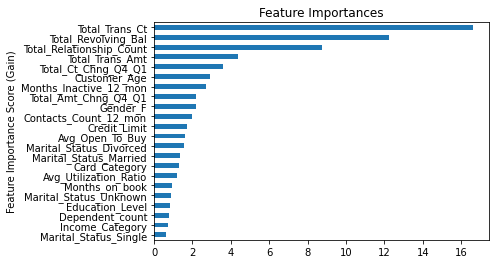

In [35]:
xgbmodel_scoring(XG_model, X_train, y_train, X_test, y_test)

The baseline model performed quite well on the test data, it earned an accuracy of 96.7%, a recall of 89.2%, and only produced 45 false negatives. This will be a hard model to beat, through tuning hopefully we are able to improve the recall score. As it stands right now, the random forest optimal model achieved a higher recall score and would consequentially be our implementation recommendation.

##### First Parameter Grid Search 
For the first parameter grid search we will focus on tuning max_depth, min_child_weight (important for class imbalance), and learning_rate. Another parameter that may help with the class imbalance problem, going to set scale_pos_weight = count(negative examples) / count(positive examples). 

Parameters explained:
- **max_depth**: Used to control overfitting, higher depth allows models to learn relations that are very specific 
- **scale_pos_weight**: This parameter generally is the ratio of number of negative class to the positive class
- **min_child_weight**: Used to control overfitting - defines the minimum sum of weights of all observations required in a child, higher values prevent learning highly specific relations
- **learning_rate**: Step size shrinkage to prevent overfitting

In [36]:
# Evaluate what the ratio is from negative to positive examples of churned customer

# Existing customers
negative_count = credit_clean_df['Attrition_Flag'].value_counts()[0]

# Churned / exited customers
positive_count = credit_clean_df['Attrition_Flag'].value_counts()[1]

# Print ratio to feed into scale_pos_weight variable
print(negative_count/positive_count)

5.224339274738783


Use scale_pos_weight = 5.22 based on the ratio computed above.

In [37]:
# Create parameter test dictionary with the values that will be tested in the grid search
param_test = {
 'max_depth':range(3,10),
 'min_child_weight':[1,2,4,6,8,10],
 'learning_rate':[0.05, 0.1, 0.15]
}

# Store grid search into variable, only specify objective and scale_pos_weight
gsearch = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic', scale_pos_weight=5.22), 
 param_grid = param_test, scoring='recall', cv=5)

# Fit grid search
gsearch.fit(X_train,y_train)

# Get best parameters for model grid search & corresponding recall score
gsearch.best_params_, gsearch.best_score_

({'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 2},
 0.9486745996365009)

Learning rate maxed out, max_depth accepted the smallest value in the optimal model though - can do another grid search for higher learning rate and lower max_depth values to see if recall can be improved. The grid search indicated that min_child_weight set at 2 resulted in the highest recall, let's compare values 2 and 3 for this parameter. The resulting recall score on the training data is significantly higher than the test data results with the baseline model.

##### Second Parameter Grid Search
Fine tuning max_depth, min_child_weight, and learning_rate so we can finalize these parameters in our final XGBoost model.

In [66]:
# Create second parameter test dictionary with the values that will be tested in the grid search
param_test2 = {
 'max_depth':[1,2,3],
 'min_child_weight':[2,3],
 'learning_rate':[0.125, 0.15, 0.175, 0.2]
}

# Store grid search into variable, specify min_child_weight also as a result of the previous search
gsearch2 = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic', scale_pos_weight=5.22), 
 param_grid = param_test2, scoring='recall', cv=5)

# Fit grid search
gsearch2.fit(X_train,y_train)

# Get best parameters for model grid search & corresponding score
gsearch2.best_params_, gsearch2.best_score_

({'learning_rate': 0.2, 'max_depth': 2, 'min_child_weight': 3},
 0.9487193481735605)

Based on the second parameter grid search, the optimal max_depth = 2 and the optimal min_child_weight = 3, we will solidify those modeling parameters. Learning rate continues to climb - will test that along with the gamma, subsample, and colsample_bytree columns. 

##### Third (Final) Parameter Grid Search
Parameters explained:
- **gamma**: Minimum loss reduction required to make a split
- **subsample**: Fraction of observations to be randomly sampled for each ree
- **colsample_bytree**: Ratio of columns when constructing each tree

In [67]:
# Create third parameter test dictionary with the values that will be tested in the grid search
param_test3 = {
 'gamma':[0, 0.1, 0.3, 0.5],
 'subsample':[0.6, 0.7, 0.8, 0.9],
 'colsample_bytree':[0.6, 0.7, 0.8, 0.9],
 'learning_rate':[0.19, 0.2, 0.21, 0.25]
}

# Store grid search into variable, now specify max_depth as a result of the second search
gsearch3 = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic', 
                                                  max_depth=2, 
                                                  min_child_weight=3, 
                                                  scale_pos_weight=5.22), 
                        param_grid = param_test3, scoring='recall', cv=5)

# Fit grid search
gsearch3.fit(X_train,y_train)

# Get best parameters for model grid search & corresponding score
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.8,
  'gamma': 0.3,
  'learning_rate': 0.19,
  'subsample': 0.8},
 0.9531402284511324)

The results of the third parameter search show a noticable difference in recall rate - at 95.3% recall we can confidently go forward with this model as is.

We could continue to tune this model, XGBoost has so many adjustable parameters - if there was more time then this model could be refined even further. 

In [70]:
#Declare best model variables
xgb_best_model = XGBClassifier(objective= 'binary:logistic', 
                               gamma = 0.3,
                               learning_rate = 0.19,
                               subsample = 0.8,
                               colsample_bytree = 0.8,
                               max_depth=2, 
                               min_child_weight=3, 
                               scale_pos_weight=5.22)

##### XGBoost Final Model Results
Use the function, xgbmodel_scoring() to get the results of the optimally tuned model on the test data.


Model Test Scores
Accuracy (Test): 0.9493
Precision (Test): 0.7812
Recall (Test): 0.9577
F1 (Test): 0.8605
AUC Score (Test): 0.952680
True Negatives: 2410
False Positives: 133
False Negatives: 21
True Positives: 475

 f19      8.025368
f9      11.857149
f11     21.657732
f18     28.821750
f0      29.752219
f12     44.868052
f8      45.909106
f5      49.653061
f15     73.818499
f7      75.269660
f21     75.579582
f13     89.872948
f6     127.737351
f16    173.584646
f10    191.179545
f14    280.150529
dtype: float64


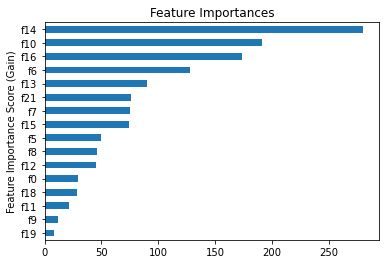

In [90]:
xgbmodel_scoring(xgb_best_model, X_train, y_train, X_test, y_test)

The feature importances are not named in the above output, in order to interpret these we need to create a workaround to tie feature names to feature importances of the model.

In [97]:
idx_df = credit_clean_df.drop("Attrition_Flag", axis=1)
feature_imp = pd.Series(xgb_best_model.feature_importances_, index = idx_df.columns.values).sort_values(ascending=False)
print(feature_imp)

Total_Trans_Ct              0.210998
Total_Revolving_Bal         0.143989
Avg_Utilization_Ratio       0.130737
Total_Relationship_Count    0.096207
Total_Trans_Amt             0.067689
Gender_F                    0.056924
Months_Inactive_12_mon      0.056690
Total_Ct_Chng_Q4_Q1         0.055597
Months_on_book              0.037397
Contacts_Count_12_mon       0.034577
Total_Amt_Chng_Q4_Q1        0.033793
Customer_Age                0.022408
Marital_Status_Married      0.021707
Avg_Open_To_Buy             0.016312
Credit_Limit                0.008930
Marital_Status_Single       0.006044
Marital_Status_Divorced     0.000000
Marital_Status_Unknown      0.000000
Card_Category               0.000000
Income_Category             0.000000
Education_Level             0.000000
Dependent_count             0.000000
Gender_M                    0.000000
dtype: float32


Of all the variables, 7 provided no importance to the model decisioning, most of which are demographic variables. The total number of transactions a customer has used is the most important feature for the optimal XGBoost model to make a decision.

Since we were tuning for recall, the final model performed exceptionally. Nearly 96% recall on the test data, our model only predicted 21 false negatives. The precision call is quite low, and the F1 score suffered as a result - but for the scope of the problem, this may be the best model to deploy in a live environment.

## RF AdaBoost

## Artificial Neural Network (ANN)

The customer attrition issue can also be solved by creating an Artificial Neural Network model (ANN). 

The business problem is a binary classification problem, specifically, whether or not a customer cancels their credit card. The output layer of the ANN will be one neuron due to the fact that we are only predicting if the customer is in one class.

Hyperparams:

- units
- input_dim
- kernal_initializer
- activation
- optimizer
- batch_size
- epochs

## Train / Test Split

In [42]:
#Split data into Target & Predictors
#Target variable is attrition flag
y = credit_clean_df['Attrition_Flag']

#The other remaining columns are the predictors 
X = credit_clean_df.drop("Attrition_Flag", axis=1)

#Get list of the names of the predictors
features = list(X)

In [43]:
#Standardize the data
ss_X = StandardScaler()
X = ss_X.fit_transform(X)

#Preview X
pd.DataFrame(data=X, columns=features).head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_F,Gender_M
0,-0.165406,0.503368,-0.354022,0.620039,-0.250587,0.384621,0.763943,-1.327136,0.492404,0.446622,...,-0.959707,-0.973895,3.834003,-0.775882,-0.282405,1.077338,-0.798507,-0.282609,-1.059956,1.059956
1,0.333570,2.043199,0.822218,-0.736292,-0.250587,1.010715,1.407306,-1.327136,-0.411616,-0.041367,...,-0.916433,-1.357340,12.608573,-0.616276,-0.282405,-0.928214,1.252337,-0.282609,0.943436,-0.943436
2,0.583058,0.503368,0.822218,1.298204,-0.250587,0.008965,0.120579,-1.327136,-2.219655,-0.573698,...,-0.740982,-1.911206,6.807864,-0.997155,-0.282405,1.077338,-0.798507,-0.282609,-1.059956,1.059956
3,-0.789126,1.273283,-0.354022,-0.736292,-0.250587,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,...,-0.951758,-1.911206,6.807864,1.759686,-0.282405,-0.928214,-0.798507,3.538459,0.943436,-0.943436
4,-0.789126,0.503368,-0.942142,0.620039,-0.250587,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,...,-1.056263,-1.570365,7.509325,-0.997155,-0.282405,1.077338,-0.798507,-0.282609,-1.059956,1.059956


In [44]:
#Split the data into training and testing sets - 70/30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
#Both y should have 1 column
assert len(y_train.shape) == len(y_test.shape) and len(y_train.shape) == 1

In [46]:
#Check the shapes
#Create list to iterate through
data_sets = [X_train, X_test, y_train, y_test]

#For each element in the list, print the shape
for i in data_sets:
    print(i.shape)

(7088, 23)
(3039, 23)
(7088,)
(3039,)


#### Building ANN Model

Epoch 1/20
709/709 [==============================] - 0s 413us/step - loss: 0.4415 - accuracy: 0.7999
Epoch 2/20
709/709 [==============================] - 0s 422us/step - loss: 0.2582 - accuracy: 0.8969
Epoch 3/20
709/709 [==============================] - 0s 413us/step - loss: 0.2321 - accuracy: 0.9055
Epoch 4/20
709/709 [==============================] - 0s 416us/step - loss: 0.2153 - accuracy: 0.9130
Epoch 5/20
709/709 [==============================] - 0s 412us/step - loss: 0.2011 - accuracy: 0.9190
Epoch 6/20
709/709 [==============================] - 0s 449us/step - loss: 0.1893 - accuracy: 0.9252
Epoch 7/20
709/709 [==============================] - 0s 521us/step - loss: 0.1795 - accuracy: 0.9297
Epoch 8/20
709/709 [==============================] - 0s 531us/step - loss: 0.1720 - accuracy: 0.9312
Epoch 9/20
709/709 [==============================] - 0s 450us/step - loss: 0.1665 - accuracy: 0.9333
Epoch 10/20
709/709 [==============================] - 0s 428us/step - loss: 0.163

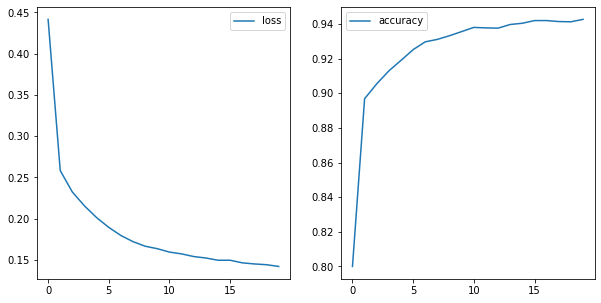

In [47]:
#Create initial ANN model
model = Sequential()

#Define input layer 
model.add(Dense(12, input_dim=23, activation='relu'))

#Define second hidden layer
model.add(Dense(8, activation='relu'))

#Define output layer
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Fit ANN on training data
results = model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1)

sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [49]:
results.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x293ea92da30>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.4415404796600342,
   0.2581745982170105,
   0.23214009404182434,
   0.2153097242116928,
   0.2011157125234604,
   0.18927447497844696,
   0.17945140600204468,
   0.17197541892528534,
   0.16645389795303345,
   0.16345582902431488,
   0.15933728218078613,
   0.1571785807609558,
   0.15394282341003418,
   0.15218046307563782,
   0.14946018159389496,
   0.14947456121444702,
   0.1463102400302887,
   0.14496921002864838,
   0.14405186474323273,
   0.14194215834140778],
  'accuracy': [0.7999435663223267,
   0.8968679308891296,
   0.905474066734314,
   0.9129514694213867,
   0.919018030166626,
   0.9252257347106934,
   0.9297404289245605,
   0.931151270866394,
   0.9332674741744995,
   0.9356659054756165,
   0.9380643367767334,
   0.9377821683883667,
   0.9376410841941833,
   0.9397573471069336,
   0.940

Tuning hyperparameters to find the best ANN model.

In [50]:
#ANN model function
def build_model(neurons, optmzr):
    model = Sequential()
    model.add(Dense(neurons, input_dim=23, activation='relu'))
    model.add(Dense(neurons-2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optmzr,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [51]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [52]:
#Create dictionary that defines the hyperparameter values that will go into the grid search
hyperparams = {'batch_size':[15, 25, 35],
              'epochs':[15, 30, 50],
              'optmzr':['adam', 'rmsprop'],
              'neurons':[5, 10, 15]}

In [53]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [54]:
#Create model
ann_model = KerasClassifier(build_model, verbose=0)

#Create grid search
grid_search = GridSearchCV(estimator=ann_model, param_grid=hyperparams, scoring='accuracy', cv=5)

In [55]:
import time

In [56]:
# #Measure time to run the models in grid search
# start = time.time()

# #Run grid search
# grid_search.fit(X_train, y_train, verbose=1)

# #Recond when model is done computing
# end = time.time()

# print("---------- Grid Search Speed:", round((end-start)/60), "minutes -----------------")
# print("---------- Best Model Hyperparams ------------")
# grid_search.best_params_

Check model with best hyperparams performance on test data

Took 18 min

Batch size = 15
epochs = 50
neurons = 15
optmzr = 'adam'

In [57]:
#Train model with best hyperparams from grid search
best_model = build_model(15, 'adam')

best_model.fit(X_train, y_train, epochs = 50, batch_size=15, verbose=0)

In [58]:
#Predict on the test data
final_preds = best_model.predict(X_test)

#Convert test data back to original scale
test = ss_X.inverse_transform(X_test)

#Data frame results
test_df = pd.DataFrame(data=test, columns = features)
test_df['Churn_Probability']=final_preds

#If above 50% probability - predict true (customer will churn)
def ClassPrediction(churnProb):
    if churnProb > 0.5:
        return(1)
    else:
        return(0)
#Create new columns for this classification
test_df['Churn_Prediction']= test_df['Churn_Probability'].apply(ClassPrediction)

#Check data frame
test_df.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_F,Gender_M,Churn_Probability,Churn_Prediction
0,48.0,3.0,1.0,1.0,0.0,39.0,4.0,3.0,4.0,2991.0,...,0.882,0.504,0.0,0.0,1.0,0.0,1.0,0.0,0.007039,0
1,59.0,1.0,1.0,1.0,0.0,53.0,5.0,5.0,4.0,2192.0,...,0.717,0.716,0.0,0.0,1.0,0.0,0.0,1.0,0.000100,0
2,37.0,2.0,4.0,1.0,0.0,36.0,4.0,3.0,3.0,1734.0,...,0.914,0.569,1.0,0.0,0.0,0.0,1.0,0.0,0.003053,0
3,47.0,3.0,6.0,2.0,0.0,36.0,4.0,2.0,3.0,4786.0,...,0.850,0.317,1.0,0.0,0.0,0.0,0.0,1.0,0.001041,0
4,42.0,3.0,0.0,4.0,0.0,33.0,3.0,3.0,2.0,3714.0,...,0.522,0.584,0.0,0.0,1.0,0.0,0.0,1.0,0.642245,1


In [59]:
#Need to input y_test as a column in the test_df - cast as a list so bypass merge errors
test_df['Churn']= list(y_test)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              3039 non-null   float64
 1   Dependent_count           3039 non-null   float64
 2   Education_Level           3039 non-null   float64
 3   Income_Category           3039 non-null   float64
 4   Card_Category             3039 non-null   float64
 5   Months_on_book            3039 non-null   float64
 6   Total_Relationship_Count  3039 non-null   float64
 7   Months_Inactive_12_mon    3039 non-null   float64
 8   Contacts_Count_12_mon     3039 non-null   float64
 9   Credit_Limit              3039 non-null   float64
 10  Total_Revolving_Bal       3039 non-null   float64
 11  Avg_Open_To_Buy           3039 non-null   float64
 12  Total_Amt_Chng_Q4_Q1      3039 non-null   float64
 13  Total_Trans_Amt           3039 non-null   float64
 14  Total_Tr

In [60]:
test_df.head(25)

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_F,Gender_M,Churn_Probability,Churn_Prediction,Churn
0,48.0,3.0,1.0,1.0,0.0,39.0,4.0,3.0,4.0,2991.0,...,0.504,0.0,0.0,1.0,0.0,1.0,0.0,0.007039,0,0
1,59.0,1.0,1.0,1.0,0.0,53.0,5.0,5.0,4.0,2192.0,...,0.716,0.0,0.0,1.0,0.0,0.0,1.0,0.000100,0,0
2,37.0,2.0,4.0,1.0,0.0,36.0,4.0,3.0,3.0,1734.0,...,0.569,1.0,0.0,0.0,0.0,1.0,0.0,0.003053,0,0
3,47.0,3.0,6.0,2.0,0.0,36.0,4.0,2.0,3.0,4786.0,...,0.317,1.0,0.0,0.0,0.0,0.0,1.0,0.001041,0,0
4,42.0,3.0,0.0,4.0,0.0,33.0,3.0,3.0,2.0,3714.0,...,0.584,0.0,0.0,1.0,0.0,0.0,1.0,0.642245,1,0
5,65.0,1.0,4.0,1.0,0.0,56.0,5.0,3.0,2.0,7636.0,...,0.000,0.0,0.0,1.0,0.0,0.0,1.0,0.003819,0,0
6,52.0,3.0,0.0,0.0,0.0,36.0,3.0,1.0,2.0,10273.0,...,0.161,0.0,0.0,1.0,0.0,1.0,0.0,0.000091,0,0
7,58.0,2.0,2.0,0.0,2.0,36.0,5.0,4.0,3.0,34516.0,...,0.054,1.0,0.0,0.0,0.0,1.0,0.0,0.203092,0,0
8,35.0,1.0,6.0,2.0,0.0,24.0,6.0,3.0,2.0,10467.0,...,0.187,0.0,0.0,1.0,0.0,0.0,1.0,0.001436,0,0
9,48.0,4.0,3.0,4.0,0.0,32.0,5.0,2.0,3.0,25190.0,...,0.000,0.0,1.0,0.0,0.0,0.0,1.0,0.959854,1,1


In [61]:
test_df['Churn'].isna().sum()

0

In [62]:
test_df.dtypes

Customer_Age                float64
Dependent_count             float64
Education_Level             float64
Income_Category             float64
Card_Category               float64
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Marital_Status_Divorced     float64
Marital_Status_Married      float64
Marital_Status_Single       float64
Marital_Status_Unknown      float64
Gender_F                    float64
Gender_M                    float64
Churn_Probability           float32
Churn_Prediction              int64
Churn                         int64
dtype: object

In [63]:
from sklearn import metrics
print('------------ Testing Accuracy ---------------')
print(metrics.classification_report(test_df['Churn'], test_df['Churn_Prediction']))
print(metrics.confusion_matrix(test_df['Churn'], test_df['Churn_Prediction']))

------------ Testing Accuracy ---------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2543
           1       0.82      0.81      0.81       496

    accuracy                           0.94      3039
   macro avg       0.89      0.89      0.89      3039
weighted avg       0.94      0.94      0.94      3039

[[2457   86]
 [  96  400]]


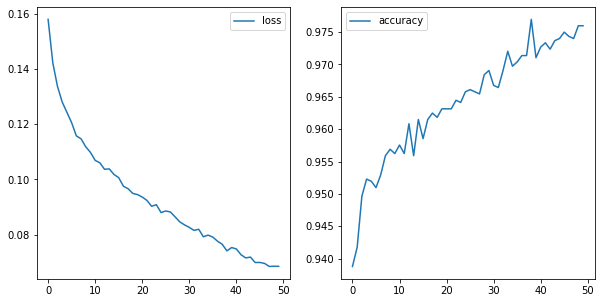

In [64]:
#Fit ANN on training data
test_results = best_model.fit(X_test, y_test, epochs = 50, batch_size=15, verbose=0)

test_sigmoid_loss = test_results.history['loss']
test_sigmoid_accuracy = test_results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=test_results.epoch, y=test_sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=test_results.epoch, y=test_sigmoid_accuracy, ax=ax2, label='accuracy');

In [65]:
best_model.fit(X_test, y_test, epochs = 50, batch_size=15, verbose=1)

Epoch 1/50
203/203 [==============================] - 0s 424us/step - loss: 0.0651 - accuracy: 0.9760
Epoch 2/50
203/203 [==============================] - 0s 424us/step - loss: 0.0663 - accuracy: 0.9780
Epoch 3/50
203/203 [==============================] - 0s 421us/step - loss: 0.0663 - accuracy: 0.9760
Epoch 4/50
203/203 [==============================] - 0s 458us/step - loss: 0.0650 - accuracy: 0.9773
Epoch 5/50
203/203 [==============================] - 0s 409us/step - loss: 0.0637 - accuracy: 0.9793
Epoch 6/50
203/203 [==============================] - 0s 426us/step - loss: 0.0641 - accuracy: 0.9796
Epoch 7/50
203/203 [==============================] - 0s 429us/step - loss: 0.0629 - accuracy: 0.9789
Epoch 8/50
203/203 [==============================] - 0s 419us/step - loss: 0.0625 - accuracy: 0.9780
Epoch 9/50
203/203 [==============================] - 0s 424us/step - loss: 0.0617 - accuracy: 0.9789
Epoch 10/50
203/203 [==============================] - 0s 429us/step - loss: 0.059

## Conclusion

The ANN worked well, but is best suited when there is more available data. The complexity and computation costs are not worth it if we get similar results from a simpler model.